In [1]:
%pylab inline
plt.rcParams['figure.figsize'] = (8, 6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
from heatlib_var import *

In [3]:
# reseni s konstatni konduktivitou
m = dict(n=100, k=2.5*np.ones(99), H=1e-6*np.ones(99), tc=35000, T0=0, q=-0.02)
init(m)

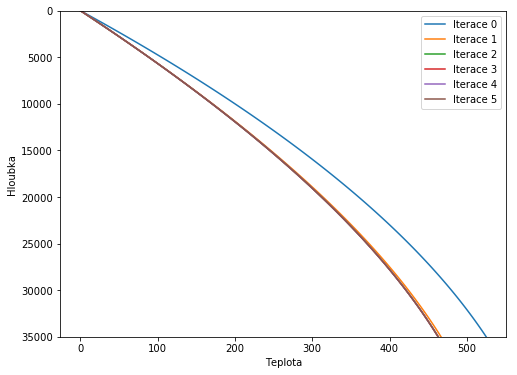

In [4]:
for i in range(5):
    plot(m['t'], m['x'], label='Iterace {}'.format(i))
    # teplota v materialovych uzlech
    tm = (m['t'][1:] + m['t'][:-1]) / 2
    # nova konduktivita
    m['k'] = 2 + exp(-tm/1250) + 48/exp((1250 - tm)/10)
    # prepocitat
    init(m)
plot(m['t'], m['x'], label='Iterace {}'.format(i + 1))
ylim(m['tc'], 0)
xlabel('Teplota')
ylabel('Hloubka')
legend()

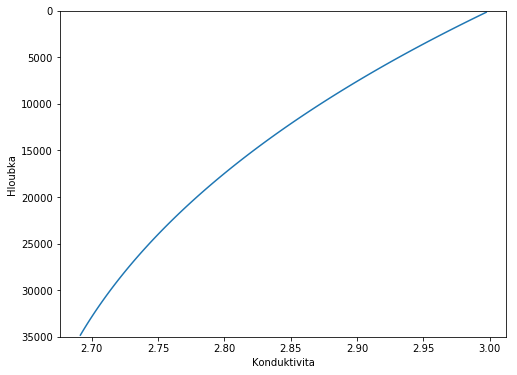

In [5]:
plot(m['k'], m['xm'])
ylim(m['tc'], 0)
xlabel('Konduktivita')
ylabel('Hloubka')

In [6]:
n=100
k=2.5*ones(99)
H=1e-6*ones(99)
tc=35000
T0=0
q=-0.02
rho = 2700*ones(99)
c = 800*ones(99)

In [9]:
T = m['t']
dx = m['dx']
dt = 1e12

In [10]:
li = k[:-1]/dx**2
ri = k[1:]/dx**2
mi = (rho[:-1] + rho[1:]) * (c[:-1] + c[1:]) / (4*dt)

In [13]:
dl = hstack((-li,  -2*k[-1]/dx**2, 0))
dh = hstack((1, mi+ri+li, rho[-1]*c[-1]/dt + 2*k[-1]/dx**2))
dr = hstack((0, 0, -ri))

In [14]:
A = spdiags([dl, dh, dr], [-1, 0, 1], n, n, 'csr')

In [15]:
Hm = (H[:-1] + H[1:])/2
b = hstack((T0, Hm + mi*T[1:-1], H[-1]-2*q/dx + T[-1]*rho[-1]*c[-1]/dt))

In [16]:
spsolve(A, b)

array([   0.        ,    6.51472848,   12.98470065,   19.41363452,
         25.80415211,   32.15808565,   38.47669828,   44.7608432 ,
         51.01107844,   57.22774954,   63.41104922,   69.56106041,
         75.6777872 ,   81.76117728,   87.81113797,   93.82754792,
         99.81026546,  105.75913466,  111.67398966,  117.55465788,
        123.40096221,  129.21272273,  134.98975782,  140.73188508,
        146.43892189,  152.11068589,  157.74699531,  163.34766917,
        168.91252749,  174.44139139,  179.93408319,  185.39042647,
        190.81024612,  196.19336839,  201.5396209 ,  206.84883265,
        212.1208341 ,  217.35545708,  222.55253489,  227.71190226,
        232.83339537,  237.91685185,  242.96211078,  247.96901273,
        252.9373997 ,  257.86711517,  262.75800409,  267.60991287,
        272.42268941,  277.19618305,  281.93024465,  286.6247265 ,
        291.2794824 ,  295.89436761,  300.46923888,  305.00395443,
        309.49837395,  313.95235863,  318.36577114,  322.73847